## Statistics Hackathon

#### Importing the Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
from matplotlib import rcParams

#### Reading the Data

In [2]:
data = pd.read_excel("./School Enrollment Statistics 2012-2016.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 96 columns):
Dise No.                6077 non-null int64
Rural / Urban           6077 non-null object
Year                    6077 non-null object
Block Code              6077 non-null int64
Block Name              6077 non-null object
Village Code            6077 non-null int64
Village Name            6077 non-null object
Zonal Office            6077 non-null object
CRC Code                6077 non-null int64
CRC No.                 6077 non-null object
Pin Code                6077 non-null int64
School Name             6077 non-null object
School Status Code      6077 non-null int64
School Status           6077 non-null object
Management Code         6077 non-null int64
Management Name         6077 non-null object
Category Code           6077 non-null int64
Category Name           6077 non-null object
School Type Code        6077 non-null int64
School Type Name        6077 non-null object
Lo

In [4]:
data.describe()

,Dise No.,Block Code,Village Code,CRC Code,Pin Code,School Status Code,Management Code,Category Code,School Type Code,Lowest Class,...,6_8 Total,1_8 Boys,1_8 Girls,1_8 Total,9_12 Boys,9_12 Girls,9_12 Total,1_12 Boys,1_12 Girls,1_12 Total
count,6.077000e+03,6077.000000,6.077000e+03,6.077000e+03,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,...,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000
mean,2.725158e+10,272515.831002,2.725158e+08,2.725158e+09,410889.798749,0.022709,14.612473,3.824420,2.878723,3.209149,...,124.498272,181.195327,161.872635,343.067961,67.332072,61.381274,128.713345,248.527398,223.253908,471.781307
std,1.376656e+05,1.377989,1.376653e+03,1.377985e+04,7382.763001,0.180914,7.155684,3.011161,0.422698,3.238724,...,197.771273,245.061331,224.598750,401.640937,192.980060,191.303518,330.509856,358.182496,347.517654,579.461969
min,2.725140e+10,272514.000000,2.725140e+08,2.725140e+09,4110.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.725150e+10,272515.000000,2.725150e+08,2.725150e+09,411009.000000,0.000000,4.000000,2.000000,3.000000,1.000000,...,5.000000,28.000000,23.000000,80.000000,0.000000,0.000000,0.000000,55.000000,50.000000,150.000000
50%,2.725160e+10,272516.000000,2.725160e+08,2.725160e+09,411028.000000,0.000000,17.000000,2.000000,3.000000,1.000000,...,67.000000,100.000000,88.000000,221.000000,0.000000,0.000000,0.000000,140.000000,127.000000,290.000000
75%,2.725170e+10,272517.000000,2.725170e+08,2.725170e+09,411041.000000,0.000000,20.000000,7.000000,3.000000,5.000000,...,145.000000,239.000000,212.000000,459.000000,50.000000,40.000000,106.000000,304.000000,267.000000,563.000000
max,2.725180e+10,272518.000000,2.725180e+08,2.725180e+09,411103.000000,2.000000,99.000000,11.000000,9.000000,12.000000,...,2327.000000,2955.000000,2628.000000,4375.000000,3365.000000,2852.000000,4411.000000,6237.000000,5199.000000,7205.000000


In [5]:
data.head()

,Dise No.,Rural / Urban,Year,Block Code,Block Name,Village Code,Village Name,Zonal Office,CRC Code,CRC No.,...,6_8 Total,1_8 Boys,1_8 Girls,1_8 Total,9_12 Boys,9_12 Girls,9_12 Total,1_12 Boys,1_12 Girls,1_12 Total
0,27251400101,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,120,128,248,0,0,0,120,128,248
1,27251400102,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,125,0,296,296,0,0,0,0,296,296
2,27251400103,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,111,283,0,283,0,0,0,283,0,283
3,27251400104,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,34,34,68,0,0,0,34,34,68
4,27251400105,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,78,79,157,0,0,0,78,79,157


In [6]:
data.columns

Index(['Dise No.', 'Rural / Urban', 'Year', 'Block Code', 'Block Name',
       'Village Code', 'Village Name', 'Zonal Office', 'CRC Code', 'CRC No.',
       'Pin Code', 'School Name', 'School Status Code', 'School Status',
       'Management Code', 'Management Name', 'Category Code', 'Category Name',
       'School Type Code', 'School Type Name', 'Lowest Class', 'Highest Class',
       'Medium Code', 'Medium', 'Building Status Code', 'Building Status',
       'Electricity Code', 'Electricity', 'Boundary Wall Code',
       'Boundary Wall', 'Library Code', 'Library', 'Playground Code',
       'Playground', 'Water Code', 'Water', 'Ramp Code', 'Ramp',
       'HM Room Code', 'HM Room', 'Kitchen Shed Code', 'Kitchen Shed',
       'Pre Primary Boys', 'Pre Primary Girls', 'Pre Primary Total', '1 Boys',
       '1 Girls', '1 Total', '2 Boys', '2 Girls', '2 Total', '3 Boys',
       '3 Girls', '3 Total', '4 Boys', '4 Girls', '4 Total', '5 Boys',
       '5 Girls', '5 Total', '6 Boys', '6 Girls', '6

### Block vs Management School Count
###### * Plot to describe how many Schools fall under each Management BlockWise

In [125]:
X=data.groupby(['Block Name','Management Name'])['Management Name'].count()
X

Block Name  Management Name                                                            
Aundh       Central School                                                                   5
            MNC                                                                            335
            No Response                                                                      1
            Partially Aided                                                                  6
            Permanent Unaided                                                              514
            Pvt. Aided                                                                     395
            Self Finance                                                                    16
            Social Welfare Aided                                                            12
            Un-Recognised                                                                   25
            Unaided                                      

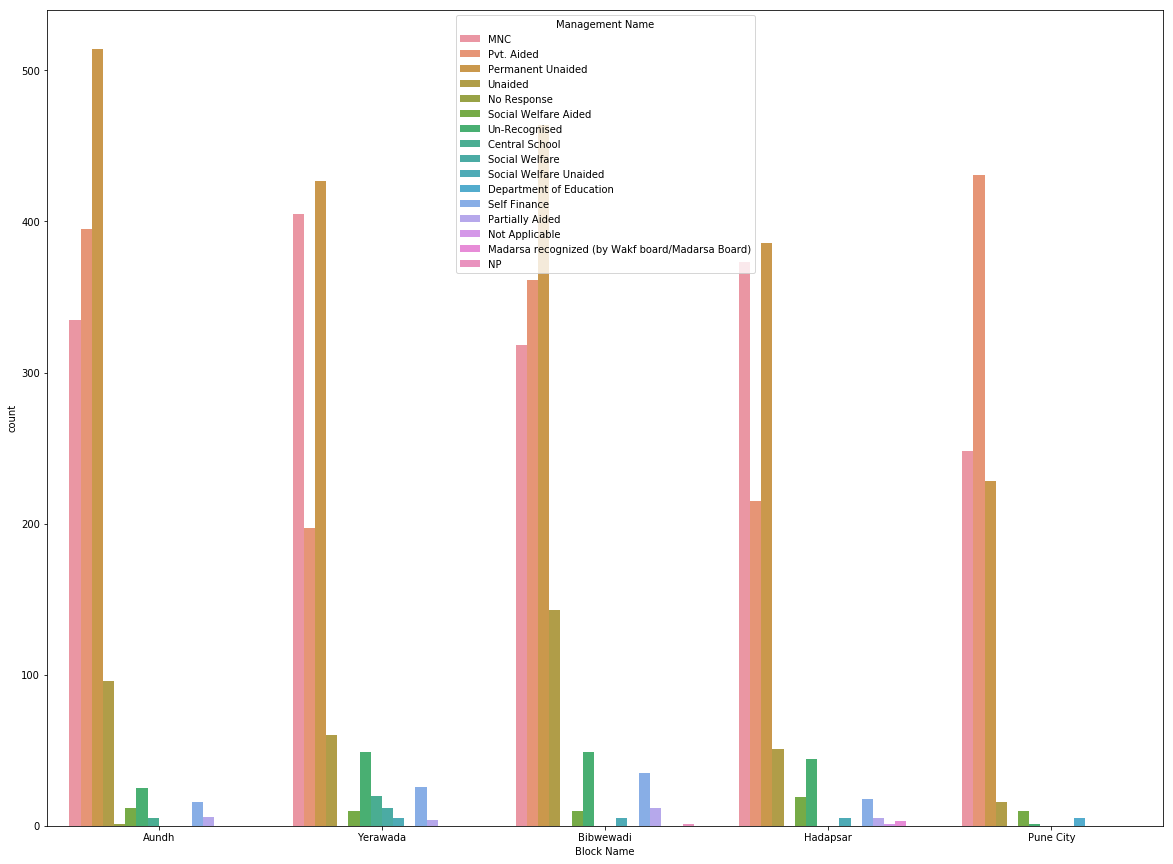

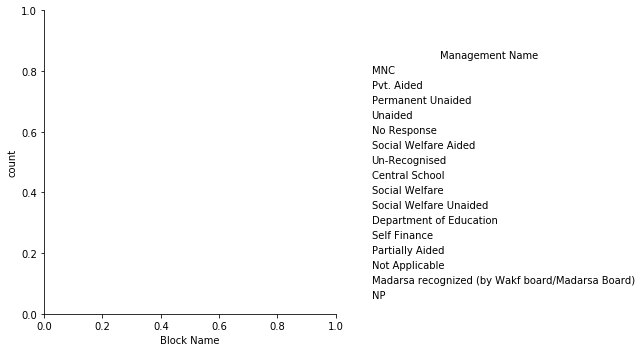

In [140]:
# plt.subplots(figsize=(20,15))
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
#fig =plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sb.catplot("Block Name", data=data, hue='Management Name',kind='count',ax=ax)

#### Which are the top 4 Managements with Maximum School Counts?

* The top 4 Management with maximum of number of schools under them are **MNC, Pvt. Aided, Permanent Unaided and Unaided**

### Management Performance based on facilities provided

** The Facilities in the schools are provided by the Management are Namely**
* Electricity
* Library
* Playground
* Ramp
* HM Room

In [162]:
data['Electricity_mod']=data['Electricity'].replace(['Yes', 'No', 'No Response','Yes but not functioning'], [1,0,0,0])

In [163]:
data['Electricity_mod'].value_counts()

1    6055
0      22
Name: Electricity_mod, dtype: int64

In [164]:
data['Library_mod']=data['Library'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [165]:
data['Library_mod'].value_counts()

1    5780
0     297
Name: Library_mod, dtype: int64

In [166]:
data['Playground_mod']=data['Playground'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [167]:
data['Playground_mod'].value_counts()

1    5044
0    1033
Name: Playground_mod, dtype: int64

In [168]:
data['Ramp_mod']=data['Ramp'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [169]:
data['Ramp_mod'].value_counts()

1    3965
0    2112
Name: Ramp_mod, dtype: int64

In [170]:
data['HM_Room_mod'] = data['HM Room'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [171]:
data['HM_Room_mod'].value_counts()

1    5818
0     259
Name: HM_Room_mod, dtype: int64

In [172]:
data['facility_count'] = data['Electricity_mod'] + data["Library_mod"] + data['Playground_mod'] + data['Ramp_mod'] + data["HM_Room_mod"]

In [173]:
data['facility_count'].value_counts()

5    3164
4    2233
3     576
2      85
1      12
0       7
Name: facility_count, dtype: int64

In [174]:
mgmt_facility = data.groupby(['Management Name'])['facility_count'].mean()

## Mgmt vs Average Facility

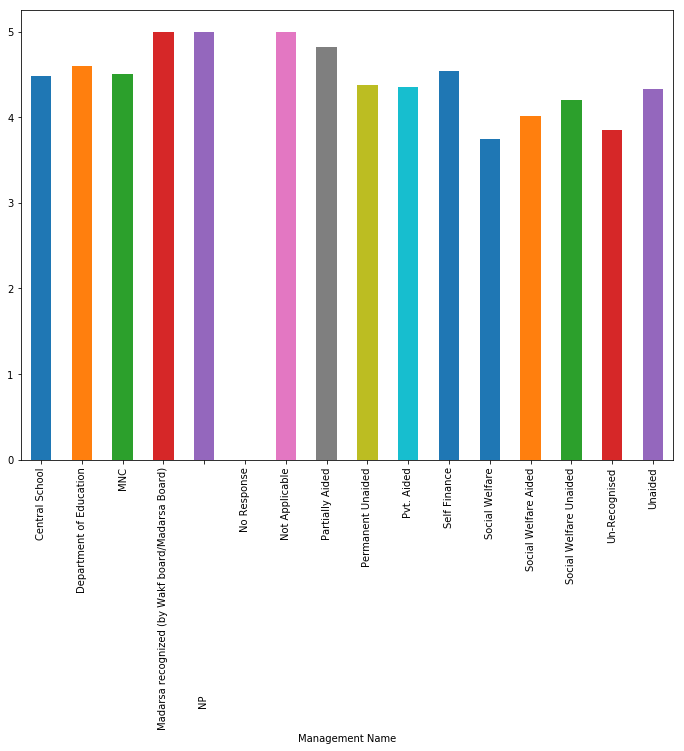

In [176]:
mgmt_facility.plot(kind='bar')

## Mgmt vs Facility vs num of Schools under mgmt

TypeError: 'Figure' object is not callable

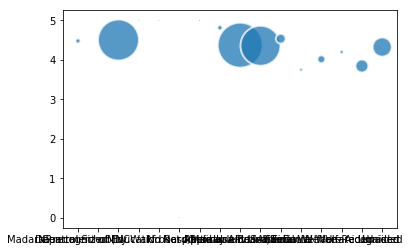

In [99]:
from pylab import *
from scipy import *

x = []
y = []
# color = []
area = []



# print(data)
for i, row in mgmt_facility.iteritems():
#  print(i, row)
 x.append(i) # murder
#  print(x)
 y.append(row) # burglary
#  color.append(row[6]) # larceny_theft 
 area.append(data['Management Name'].value_counts()[i]) # population
 # plotting the first eigth letters of the state's name
#  text(row[1], row[5], 
#       row[0],size=11,horizontalalignment='center')

# making the scatter plot
sct = scatter(x, y, s=area, linewidths=2, edgecolor='w')
sct.set_alpha(0.75)
#sct.figure(figsize=(8, 8), dpi=80)

# axis([0,11,200,1280])
xlabel('Murders per 100,000 population')
ylabel('Burglaries per 100,000 population')
show()

In [101]:
data['Year'].value_counts()

2016-17    1247
2015-16    1233
2014-15    1223
2013-14    1190
2012-13    1184
Name: Year, dtype: int64

## 1_5 Total vs Time|Region

Text(0.5, 1.0, '1_5 Total vs Time|Region')

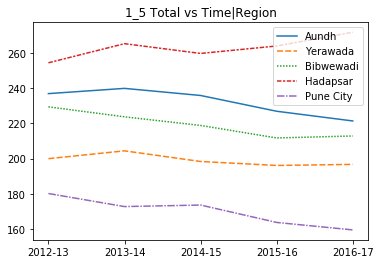

In [159]:
block_year_1_5_enroll = data.groupby(["Block Name", "Year"])['1_5 Total'].mean()
# sb.lineplot(data=block_year_1_5_enroll)
list_of_block = []
for block, val in data['Block Name'].value_counts().iteritems():
    temp = []
    for i,j in block_year_1_5_enroll.iteritems():
        if block == i[0]:
            temp.append(j)
    list_of_block.append(temp)
    
# for each in list_of_block:
#     plt.plot(each[1])
#     plt.title()
df = pd.DataFrame(columns=data['Block Name'].unique(), index=data['Year'].unique())

df['Aundh'] = list_of_block[0]
df['Bibwewadi'] = list_of_block[1]
df['Yerawada'] = list_of_block[2]
df['Hadapsar'] = list_of_block[3]
df['Pune City'] = list_of_block[4]
# df.plot(figsize=(10,5))
sb.lineplot(data=df, sizes=(10,10))
plt.title("1_5 Total vs Time|Region")
# aggregated = data.groupby(["Block Name", "Year"]).aggregate(np.mean)
# aggregated.plot(x='Year', y='Block Name', label='model')
# plt.xticks
# plt.show()
# for title, group in data.groupby(["Block Name", "Year"]).agge:
#     group.plot(x='Block Name', y='Year', title=title)
# df = pd.DataFrame(block_year_1_5_enroll)

# plt.show()



In [138]:
data.groupby(["Block Name", "Year"])['1_5 Total'].mean()

Block Name  Year   
Aundh       2012-13    236.822464
            2013-14    239.795620
            2014-15    235.763441
            2015-16    226.812721
            2016-17    221.307167
Bibwewadi   2012-13    229.321168
            2013-14    223.649635
            2014-15    218.752650
            2015-16    211.658451
            2016-17    212.773852
Hadapsar    2012-13    254.314010
            2013-14    265.161290
            2014-15    259.620087
            2015-16    263.852814
            2016-17    271.652542
Pune City   2012-13    180.127660
            2013-14    172.719577
            2014-15    173.583784
            2015-16    163.712766
            2016-17    159.470899
Yerawada    2012-13    199.912134
            2013-14    204.343220
            2014-15    198.303644
            2015-16    196.052632
            2016-17    196.666667
Name: 1_5 Total, dtype: float64

In [145]:
data['Block Name'].value_counts()

Aundh        1405
Bibwewadi    1398
Yerawada     1215
Hadapsar     1120
Pune City     939
Name: Block Name, dtype: int64